Currently, the particles are x,y,z and diameter  
Find Upper and lower limits for x and y to find paremeter of data cube  
Using np.histogram2D, pass in the data cubes as ones and zeros  
z plane of the cube is the multiple images  
Will use zlib compression becuse there will not be much data

In [47]:
import numpy as np
import xarray as xr
import pandas as pd

ds3 = xr.open_dataset('/glade/u/home/gwallach/synthetic_holograms_v02.nc')
x_values = []
y_values = []
hists3 = []


#increment by 3 to seperate images
for i in ds3['x'].values[::3]:
    x_values.append([i,i+1,i+2])
for i in ds3['y'].values[::3]:
    y_values.append([i,i+1,i+2])
    
binsx = len(np.arange(0,1771,10))
binsy = len(np.arange(0,1180,10))
    
for ii in range(len(x_values)):    
    hist = np.histogram2d(x_values[ii],y_values[ii],bins = [binsx,binsy])[0]
    hists3.append(hist)

cube = xr.DataArray(hists3)
cube.to_netcdf('data_cube.nc')

In [53]:
data_cube = xr.open_dataset('data_cube.nc')
#print(data_cube.keys)
print(data_cube.values)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:                        (dim_0: 10000, dim_1: 178, dim_2: 118)
Dimensions without coordinates: dim_0, dim_1, dim_2
Data variables:
    __xarray_dataarray_variable__  (dim_0, dim_1, dim_2) float64 ...>


In [54]:
[0]

AttributeError: module 'matplotlib.pyplot' has no attribute 'hists3'

In [28]:
check = []
for i in range(dims[0]):
    for ii in range(dims[1]):
        check.append(hists3[0][i][ii])
if 1 in check: print("Found")

In [36]:
print(x_values[0])
print(y_values[0])
print(len(binsx),len(binsy))
hist = np.histogram2d(x_values[0],y_values[0],bins = [178,118])[0]
#print(hist)
#binsx = 

[731.4519, 732.451904296875, 733.451904296875]
[-263.08246, -262.08245849609375, -261.08245849609375]
178 118


In [44]:
hist.shape
hist[0]
hists3[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
check = []
for i in range(178):
    for ii in range(118):
        if (hist[i][ii]) == 1:
            print("Found")

Found
Found
Found


In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import time,sys
from IPython.display import clear_output

In [3]:
ds = xr.open_dataset('/glade/u/home/gwallach/synthetic_holograms_v01.nc')
ds.sizes
xsize = 600
ysise = 400

Passing only the x & y variables into new arrays, so that they can be passed into histogram2d

In [4]:
xa = []
ya = []
xa = ds.data_vars['x'].values
xa = xa.astype(int)
ya = ds.data_vars['y'].values
ya = ya.astype(int)
print(len(xa))
print(len(ya))
print(xa.min())
print(xa.max())
print(ya.min())
print(ya.max())

10000
10000
-887
884
-591
589


In [5]:
ds["hid"]

<xarray.DataArray 'hid' (particle: 10000)>
array([1.000e+00, 2.000e+00, 3.000e+00, ..., 9.998e+03, 9.999e+03, 1.000e+04],
      dtype=float32)
Dimensions without coordinates: particle
Attributes:
    longname:  Hologram index (1-based, first hologram index = 1)
    units:     unitless

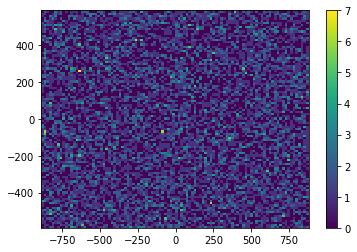

In [6]:
hist = plt.hist2d(xa,ya,bins = 100)
plt.colorbar()


In [7]:
#turn the data into a seperate 2d histogram for each image
#Use 3 particle image 
#Also use varying particle image
#meant to make it easier to train the nueral network
#Make 2d array of fixed size that divides the domain up into bins
#Find 2d histogram for every image of the multiple particle data, and stack those histograms on top of eachother

In [ ]:
#get 3 particle image
ds3 = xr.open_dataset('/glade/u/home/gwallach/synthetic_holograms_v02.nc')
ds3.values()
len(ds3['x'])
hists3 = []
#create 2D histogram for every image
x_values = []
y_values = []
#increment by 3 to seperate images
for i in ds3['x'].values[::3]:
    x_values.append([i,i+1,i+2])
for i in ds3['y'].values[::3]:
    y_values.append([i,i+1,i+2])
#create 2D histogram for every image
#hist = np.histogram2d(x_values[1],y_values[1])
#print(type(hist))
#print(hist)
for ii in range(len(x_values)):
    hist = np.histogram2d(x_values[ii],y_values[ii],bins = 240000)
    hists3.append(hist)
#for i in range(3):
    #print(hists3[i])

#create data cube


In [23]:
for i in range(10):
    print(hists3[i])

(array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]]), array([731.4519043, 731.4719043, 731.4919043, 731.5119043, 731.5319043,
       731.5519043, 731.5719043, 731.5919043, 731.6119043, 731.6319043,
       731.6519043, 731.6719043, 731.6919043, 731.7119043, 731.7319043,
       731.7519043, 731.7719043, 731.7919043, 731.8119043, 731.8319043,
       731.8519043, 731.8719043, 731.8919043, 731.9119043, 731.9319043,
       731.9519043, 731.9719043, 731.9919043, 732.0119043, 732.0319043,
       732.0519043, 732.0719043, 732.0919043, 732.1119043, 732.1319043,
       732.1519043, 732.1719043, 732.1919043, 732.2119043, 732.2319043,
       732.2519043, 732.2719043, 732.2919043, 732.3119043, 732.3319043,
       732.3519043, 732.3719043, 732.3919043, 732.4119043, 732.4319043,
       732.4519043, 732.4719043, 732.

In [ ]:
#combine the matrices into a data cube
#print(hists3[0][0])
#print(hists3[1][0])


data_cube = hists3[0][0]

for i in range(1,10000):
    data_cube = data_cube + hists3[i][0]
    
#visualize datacube
print(data_cube)

In [ ]:
#get multiparticle data
dsmulti = xr.open_dataset('/glade/u/home/gwallach/synthetic_holograms_v03.nc')
dsmulti.values()
dsmulti['image']
